In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
#PREPARAMOS DATASET
datos = pd.read_csv('dataset.csv', sep=";", decimal='.')
datos

# Asignar nombre a las columnas
columnas=['Unnamed: 0', 'Country or Area', 'Year', 'Metano', 'Co2', 'N2o',
       'Temperature', 'Code', 'Hydropower',
       'Solar', 'Wind',
       'Other renewables']

# Descargar el dataset
datos = pd.read_csv('dataset.csv', sep=";", names=columnas, header=0,thousands=' ', decimal='.')

#Eliminar columnas sin nombre
datos=datos.drop(['Unnamed: 0'], axis=1)
datos

,Country or Area,Year,Metano,Co2,N2o,Temperature,Code,Hydropower,Solar,Wind,Other renewables
0,Australia,2018,109532.0,415953,20114.0,1.112,AUS,1.726,12.0000,16.266,3.539
1,Australia,2017,108170.0,415097,21265.0,1.117,AUS,1.353,8.0000,13.193,3.543
2,Australia,2016,105873.0,411031,19566.0,1.142,AUS,1.768,7.0000,13.026,3.648
3,Australia,2015,105368.0,401554,19557.0,1.051,AUS,1.394,5.0000,11.802,3.691
4,Australia,2014,105070.0,394116,20096.0,1.139,AUS,1.453,4.0000,9.777,3.546
...,...,...,...,...,...,...,...,...,...,...,...
1171,Brasil,2014,567542.0,552841,NaN,1.293,BRA,373.439,0.0161,12.210,46.384
1172,Brasil,2015,532432.0,521457,NaN,1.697,BRA,359.742,0.0589,21.625,49.236
1173,Brasil,2016,576542.0,488167,NaN,1.607,BRA,380.910,0.0853,33.488,51.040
1174,Brasil,2017,534321.0,497271,NaN,1.498,BRA,370.906,0.8318,42.373,51.272


In [19]:
#ESTIMAMOS VALORES AUSENTES
import numpy as np
from sklearn.impute import SimpleImputer

datos["N2o"]=datos["N2o"].fillna(datos["N2o"].mean())
datos["Metano"]=datos["Metano"].fillna(datos["Metano"].mean())
datos.head()

,Country or Area,Year,Metano,Co2,N2o,Temperature,Code,Hydropower,Solar,Wind,Other renewables
0,Australia,2018,109532.0,415953,20114.0,1.112,AUS,1.726,12.0,16.266,3.539
1,Australia,2017,108170.0,415097,21265.0,1.117,AUS,1.353,8.0,13.193,3.543
2,Australia,2016,105873.0,411031,19566.0,1.142,AUS,1.768,7.0,13.026,3.648
3,Australia,2015,105368.0,401554,19557.0,1.051,AUS,1.394,5.0,11.802,3.691
4,Australia,2014,105070.0,394116,20096.0,1.139,AUS,1.453,4.0,9.777,3.546


In [20]:
datos=datos.drop(columns=["Country or Area","Code","Year"])
datos["Metano"]=datos["Metano"].astype('int')
datos["N2o"]=datos["N2o"].astype('int')
datos["Temperature"]=datos["Temperature"].astype('float64')


datos["Hydropower"] = pd.to_numeric(datos.Hydropower, errors='coerce')



#datos["Hydropower"]=datos["Hydropower"].astype('int')
#datos["Solar"]=datos["Solar"].astype('float64')
#datos["Wind"]=datos["Wind"].astype('float64')
datos["Other renewables"]=datos["Other renewables"].astype('float64')

In [21]:
from sklearn import preprocessing
import pandas as pd

#NORMALIZAMOS TODO EL DATASET
scaler=preprocessing.MinMaxScaler()
names=datos.columns
datos = scaler.fit_transform(datos)
datos= pd.DataFrame(datos, columns=names)
datos.head()

,Metano,Co2,N2o,Temperature,Hydropower,Solar,Wind,Other renewables
0,0.0512,0.0371,0.0431,0.5669,0.0019,0.0390,0.0444,0.0373
1,0.0506,0.0370,0.0456,0.5681,0.0015,0.0260,0.0360,0.0374
2,0.0495,0.0367,0.0419,0.5741,0.0019,0.0228,0.0356,0.0385
3,0.0493,0.0358,0.0419,0.5523,0.0015,0.0163,0.0322,0.0389
4,0.0491,0.0351,0.0430,0.5734,0.0016,0.0130,0.0267,0.0374


In [22]:
#Iniciamos el proceso del análisis predictivo con el tratado de los datos y que así nos permitan trabajar con el modelo
#predictivo sin problema alguno

X=datos.iloc[:,1:4].values
y=datos.iloc[:,5].values
#Simplemente generamos los valores de X(METANO,CO2,N2O), e Y(Temperature)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [23]:
datos.head()

,Metano,Co2,N2o,Temperature,Hydropower,Solar,Wind,Other renewables
0,0.0512,0.0371,0.0431,0.5669,0.0019,0.0390,0.0444,0.0373
1,0.0506,0.0370,0.0456,0.5681,0.0015,0.0260,0.0360,0.0374
2,0.0495,0.0367,0.0419,0.5741,0.0019,0.0228,0.0356,0.0385
3,0.0493,0.0358,0.0419,0.5523,0.0015,0.0163,0.0322,0.0389
4,0.0491,0.0351,0.0430,0.5734,0.0016,0.0130,0.0267,0.0374


In [24]:
## LIBRERÍAS

# Numpy
import numpy as np 
# Matplotlib
import matplotlib.pyplot as plt
# Pandas
import pandas as pd 
from pandas import datetime

from sklearn.metrics import mean_squared_error
# Time
import time
# Yfinance
import yfinance as yf 

import os

import random

import tensorflow as tf

from pprint import pprint

pd.set_option('precision', 4)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

from sklearn.metrics import accuracy_score


In [25]:
## SELECCIÓN DE COLUMNAS Y CREACIÓN DE COLUMNAS CON OTRAS VARIABLES FINANCIERAS

data = datos['Metano'] # Solo vamos a trabajar con la columna "Close", no nos hacen falta todas.

data = pd.DataFrame(data)
window = 20

data['mide_tend'] = np.log(data['Metano']/data['Metano'].shift(1))
data['mom'] = data['mide_tend'].rolling(window).mean() # Variable "momento"
data['vol'] = data['mide_tend'].rolling(window).std() # Variable "volatilidad" (volumen)

data.dropna(inplace = True)

In [26]:
data

,Metano,mide_tend,mom,vol
20,0.0548,0.0361,0.0034,0.0203
21,0.0553,0.0089,0.0045,0.0199
22,0.0540,-0.0245,0.0043,0.0201
23,0.0539,-0.0017,0.0045,0.0201
24,0.0547,0.0145,0.0053,0.0201
...,...,...,...,...
1171,0.2665,0.1460,0.0302,0.0711
1172,0.2500,-0.0639,0.0239,0.0737
1173,0.2708,0.0797,0.0291,0.0737
1174,0.2509,-0.0761,0.0197,0.0746


In [27]:
## CREACION DE LOS CONJUNTOS DE ENTRENAMIENTO Y TESTEO

split = int(len(data)*0.8)
train = data[:split].copy()
test = data[split:].copy()

In [28]:
## NORMALIZACIÓN GAUSSIANA

mu, std = train.mean(), train.std()

train = (train - mu)/std
test = (test - mu)/std

In [29]:
## RED NEURONAL Y SEMILLAS

lags = 5

In [30]:
# Función con nuestro modelo de red neuronal

def create_rnn_model(hu = 100, lags = lags, layer = 'SimpleRNN', features = 1, algorithm = 'estimation'):
    model = Sequential()
    if layer == 'SimpleRNN':
        model.add(SimpleRNN(hu, activation = 'relu', input_shape = (lags, features)))
    else:
        model.add(LSTM(hu, activation = 'relu', input_shape = (lags, features)))
    if algorithm  == 'estimation':
        model.add(Dense(1, activation = 'linear'))
        model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
    else: 
        model.add(Dense(1, activation = 'sigmoid'))
        model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
    return model


In [31]:
# Función para establecer una semilla (para que los resultados sean reproducibles)

def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seeds()

## CREACIÓN Y AJUSTE DEL MODELO

model = create_rnn_model(features = len(data.columns))

g = TimeseriesGenerator(train.values, train['mide_tend'].values, length=lags, batch_size = 5)

model.fit(g, epochs = 100, steps_per_epoch=10, verbose = False)

In [32]:
## PREDICCIÓN Y TESTEO

g_ = TimeseriesGenerator(test.values, test['mide_tend'].values, length = lags, batch_size=5)

predictions = model.predict(g_).flatten() # El flatten es para que el array devuelto sea horizontal.

print(accuracy_score(np.sign(test['mide_tend'].iloc[lags:]), np.sign(predictions))) # 53.18%.

# Tengo que hacer la comparación con el caso sin normalización y extra de variables, ya que cuando lo hice aún usaba
# un dataset variable. Sin embargo, el resultado no ha variado significativamente en ninguna ejecución
# y un modelo normalizado ayuda a que todas las variables tengan un peso similar (esto no ha influido ahora,
# pero podría hacerlo en un futuro).

## REPRESENTACIÓN GRÁFICA

test['pred'] = np.nan
test['pred'].iloc[lags:] = predictions
test.dropna(inplace = True)

0.1981981981981982


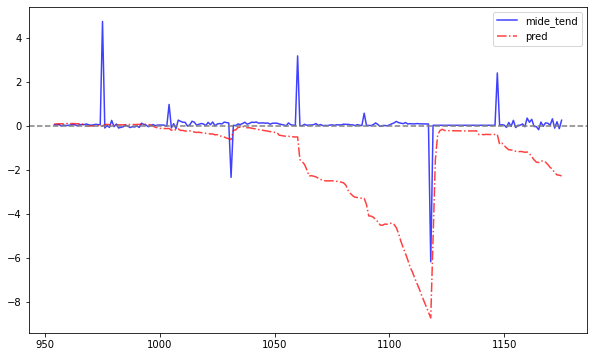

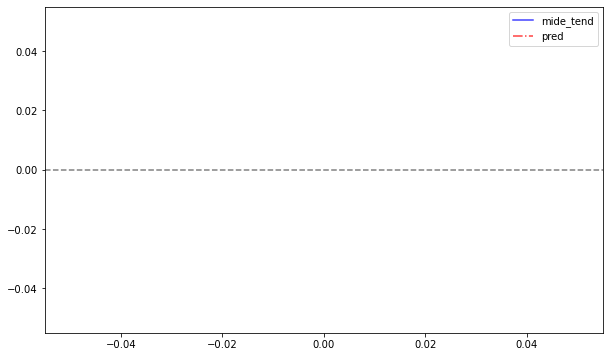

In [33]:
# En el siguiente gráfico no se aprecia bien la comparación entre la predicción y los datos de testeo:

test[['mide_tend','pred']].plot(figsize=(10,6), style = ['b','r-.'], alpha = 0.75);
plt.axhline(0, c='grey', ls = '--')
plt.show()

# En este otro se puede observar con más detalle un ejemplo de cómo se comportan las predicciones:

test[['mide_tend','pred']].iloc[1780:].plot(figsize=(10,6), style = ['b','r-.'], alpha = 0.75);
plt.axhline(0, c='grey', ls = '--')
plt.show()

# Con esto hemos convertido un problema de predicción en uno de clasificación (aunque hemos perdido información en el 
# proceso, en el sentido de que también es importante conocer cuánto varían los precios, no solo hacia dónde varían).
